## Decision Tree

## Part 1. Predicting App Install Category (High vs. Low)

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/MachineLearningProject/cleaned_data.csv')

Mounted at /content/drive


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Version,Android Version
0,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2867.2,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4
1,Paper flowers instructions,Art And Design,4.4,167,5734.4,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1,2.3
2,Infinite Painter,Art And Design,4.1,36815,29696.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2
3,Garden Coloring Book,Art And Design,4.4,13791,33792.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0
4,Text on Photo - Fonteee,Art And Design,4.4,13880,28672.0,1000000,Free,0.0,Everyone,Art & Design,2017-10-27,1.0.4,4.1


In [ ]:
df['Install_Label'] = df['Installs'].apply(lambda x: 'high' if x > 500000 else 'low')

In [ ]:
#features and target
X = df.select_dtypes(include=['number']).drop('Installs', axis=1)
y = df['Install_Label']

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [ ]:
train_data = pd.DataFrame(X_train, columns=X.columns)
train_data['Install_Label'] = y_train
print("Training Dataset:")
print(train_data.head(10))

Training Dataset:
     Rating  Reviews     Size  Price  Android Version Install_Label
0  4.200000    18773  12288.0   0.00              4.4          high
1  4.200000  1497361  33792.0   0.00              4.1          high
2  4.100000     6267   1740.8   0.00              3.2          high
3  3.700000     7203  32768.0   0.00              4.0          high
4  4.400000   552635  29696.0   0.00              4.1          high
5  4.700000    23802    173.0   4.99              4.0           low
6  3.700000        6   7987.2   0.00              4.0           low
7  4.500000        4    511.0   0.00              4.0           low
8  4.600000   172640  14336.0   0.00              4.1          high
9  4.193338        2   4608.0   0.00              4.4           low


In [ ]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test_data = pd.DataFrame(X_test, columns=X.columns)
test_data['Install_Label'] = y_test
print("\nTesting Dataset:")
print(test_data.head(10))


Testing Dataset:
     Rating  Reviews     Size  Price  Android Version Install_Label
0  4.193338        3   1740.8   0.00              4.0           low
1  4.500000   107724   6656.0   0.00              4.0          high
2  3.800000    24517  22528.0   0.00              5.0          high
3  3.800000       30   2048.0   6.99              2.3           low
4  4.200000    22650   1536.0   0.00              4.0          high
5  4.193338        0  11264.0   0.00              4.1           low
6  3.900000     1075   8499.2   2.99              4.4           low
7  4.100000   285838  15360.0   0.00              4.1          high
8  4.800000      100   4608.0   0.00              4.4           low
9  4.100000      215  30720.0   0.00              4.0           low


In [ ]:
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

In [ ]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.9414


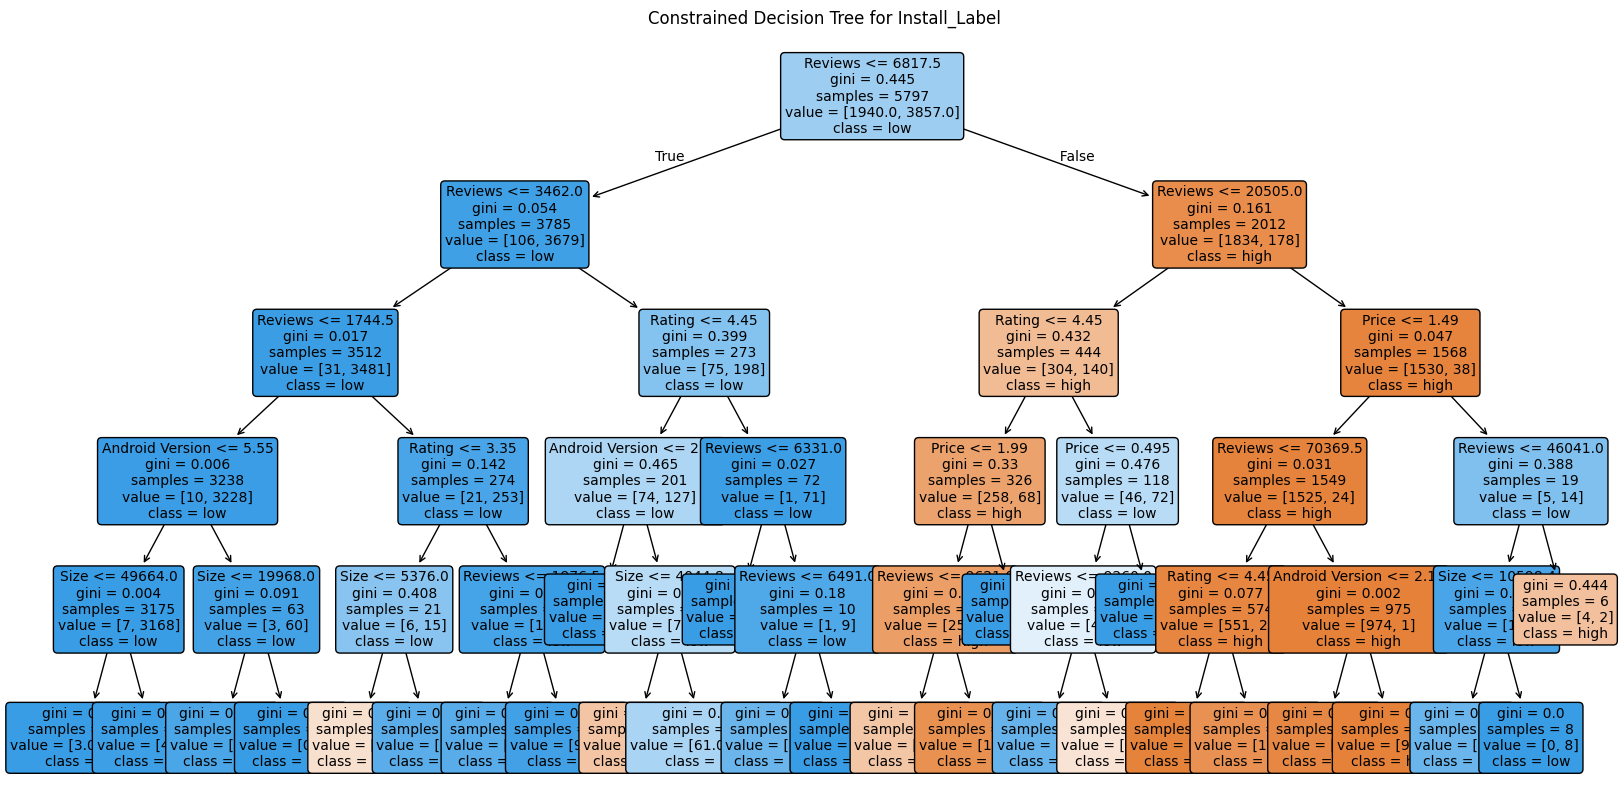

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=dt_classifier.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Constrained Decision Tree for Install_Label")
plt.show()

In [ ]:
#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=dt_classifier.classes_))


Classification Report:
              precision    recall  f1-score   support

        high       0.90      0.92      0.91       493
         low       0.96      0.95      0.96       957

    accuracy                           0.94      1450
   macro avg       0.93      0.94      0.94      1450
weighted avg       0.94      0.94      0.94      1450



In [ ]:
precision = precision_score(y_test, y_pred, pos_label='high', average='binary')
recall = recall_score(y_test, y_pred, pos_label='high', average='binary')
f1 = f1_score(y_test, y_pred, pos_label='high', average='binary')

print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.90
Recall: 0.92
F1-Score: 0.91


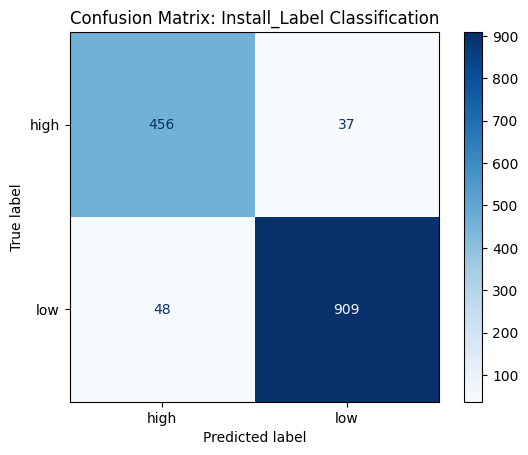

In [ ]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=dt_classifier.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix: Install_Label Classification")
plt.show()

## Part 2. Predicting App Rating Category (Low, Average, High)

In [ ]:
#Rating - Low, Average, High
def categorize_rating(rating):
    if rating < 3.0:
        return 'Low'
    elif 3.0 <= rating < 4.0:
        return 'Average'
    else:
        return 'High'

In [ ]:
df['Rating_Label'] = df['Rating'].apply(categorize_rating)

In [ ]:
X = df.select_dtypes(include=['number']).drop('Rating', axis=1)
y = df['Rating_Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
train_data = pd.DataFrame(X_train, columns=X.columns)
train_data['Rating_Label'] = y_train
print("Training Dataset:")
print(train_data.head(10))

Training Dataset:
   Reviews     Size   Installs  Price  Android Version Rating_Label
0    18773  12288.0   10000000   0.00              4.4         High
1  1497361  33792.0  100000000   0.00              4.1         High
2     6267   1740.8    1000000   0.00              3.2         High
3     7203  32768.0    1000000   0.00              4.0      Average
4   552635  29696.0   10000000   0.00              4.1         High
5    23802    173.0     100000   4.99              4.0         High
6        6   7987.2       1000   0.00              4.0      Average
7        4    511.0         50   0.00              4.0         High
8   172640  14336.0    5000000   0.00              4.1         High
9        2   4608.0         10   0.00              4.4         High


In [ ]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test_data = pd.DataFrame(X_test, columns=X.columns)
test_data['Rating_Label'] = y_test
print("\nTesting Dataset:")
print(test_data.head(10))


Testing Dataset:
   Reviews     Size  Installs  Price  Android Version Rating_Label
0        3   1740.8       100   0.00              4.0         High
1   107724   6656.0   5000000   0.00              4.0         High
2    24517  22528.0  10000000   0.00              5.0      Average
3       30   2048.0      1000   6.99              2.3      Average
4    22650   1536.0   1000000   0.00              4.0         High
5        0  11264.0        10   0.00              4.1         High
6     1075   8499.2     50000   2.99              4.4      Average
7   285838  15360.0  10000000   0.00              4.1         High
8      100   4608.0      5000   0.00              4.4         High
9      215  30720.0     10000   0.00              4.0         High


In [ ]:
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
y_pred = dt_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")


Accuracy: 0.7993


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=dt_classifier.classes_))


Classification Report:
              precision    recall  f1-score   support

     Average       0.75      0.02      0.04       267
        High       0.80      1.00      0.89      1155
         Low       0.00      0.00      0.00        28

    accuracy                           0.80      1450
   macro avg       0.52      0.34      0.31      1450
weighted avg       0.78      0.80      0.72      1450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


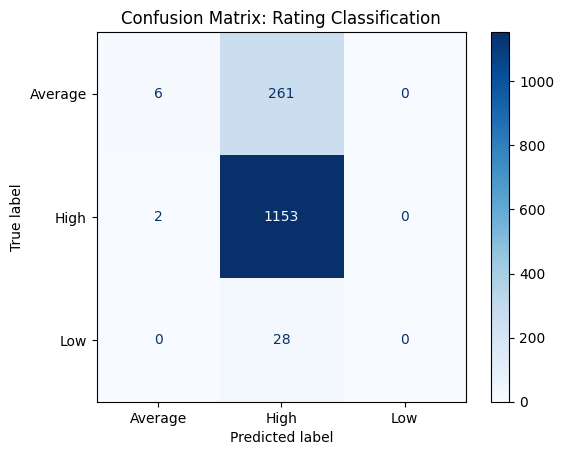

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=dt_classifier.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix: Rating Classification")
plt.show()

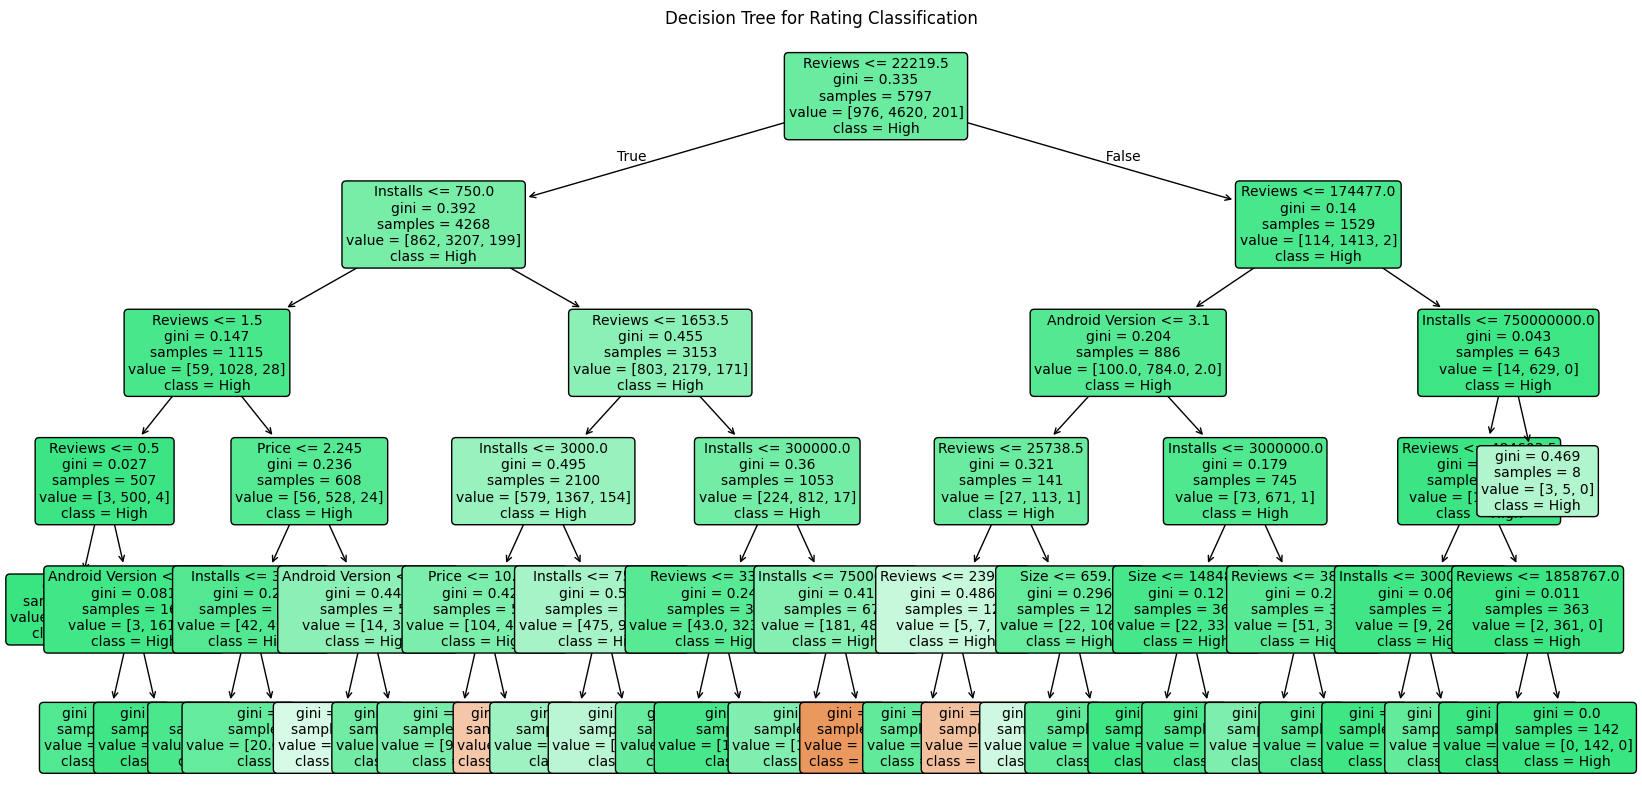

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=dt_classifier.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Rating Classification")
plt.show()


Feature Importances:
           Feature  Importance
2         Installs    0.533385
0          Reviews    0.404505
3            Price    0.037788
4  Android Version    0.017387
1             Size    0.006935


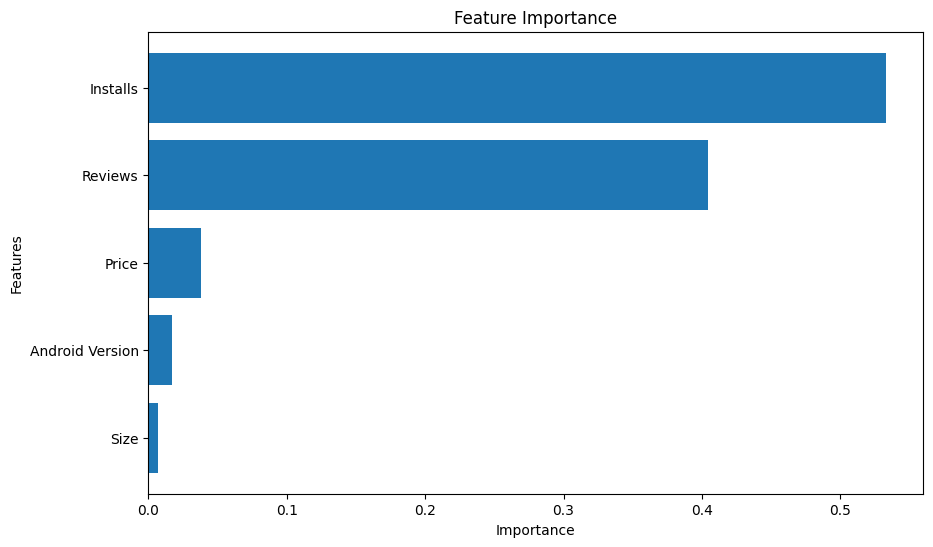

In [ ]:
#feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#Drop low-importance features
X_reduced = X.drop(['Size', 'Android Version'], axis=1)

In [ ]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [ ]:
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_classifier.fit(X_train_reduced, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [ ]:
y_pred_reduced = dt_classifier.predict(X_test_reduced)

In [ ]:
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"\nAccuracy with reduced features: {accuracy_reduced:.4f}")


Accuracy with reduced features: 0.7986


In [ ]:
print("\nClassification Report with Reduced Features:")
print(classification_report(y_test, y_pred_reduced, target_names=dt_classifier.classes_))


Classification Report with Reduced Features:
              precision    recall  f1-score   support

     Average       0.71      0.02      0.04       267
        High       0.80      1.00      0.89      1155
         Low       0.00      0.00      0.00        28

    accuracy                           0.80      1450
   macro avg       0.50      0.34      0.31      1450
weighted avg       0.77      0.80      0.71      1450



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


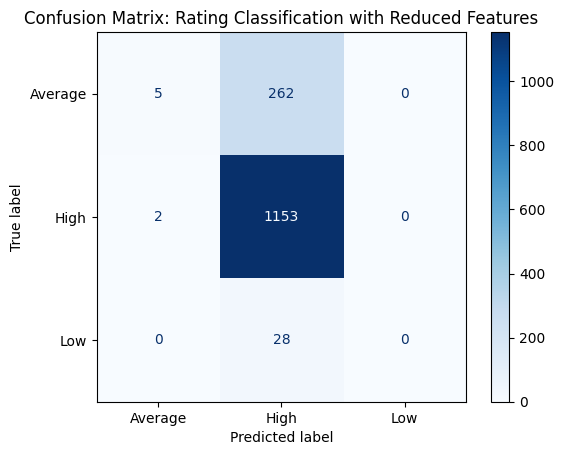

In [ ]:
# Confusion Matrix
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)
ConfusionMatrixDisplay(conf_matrix_reduced, display_labels=dt_classifier.classes_).plot(cmap='Blues')
plt.title("Confusion Matrix: Rating Classification with Reduced Features")
plt.show()

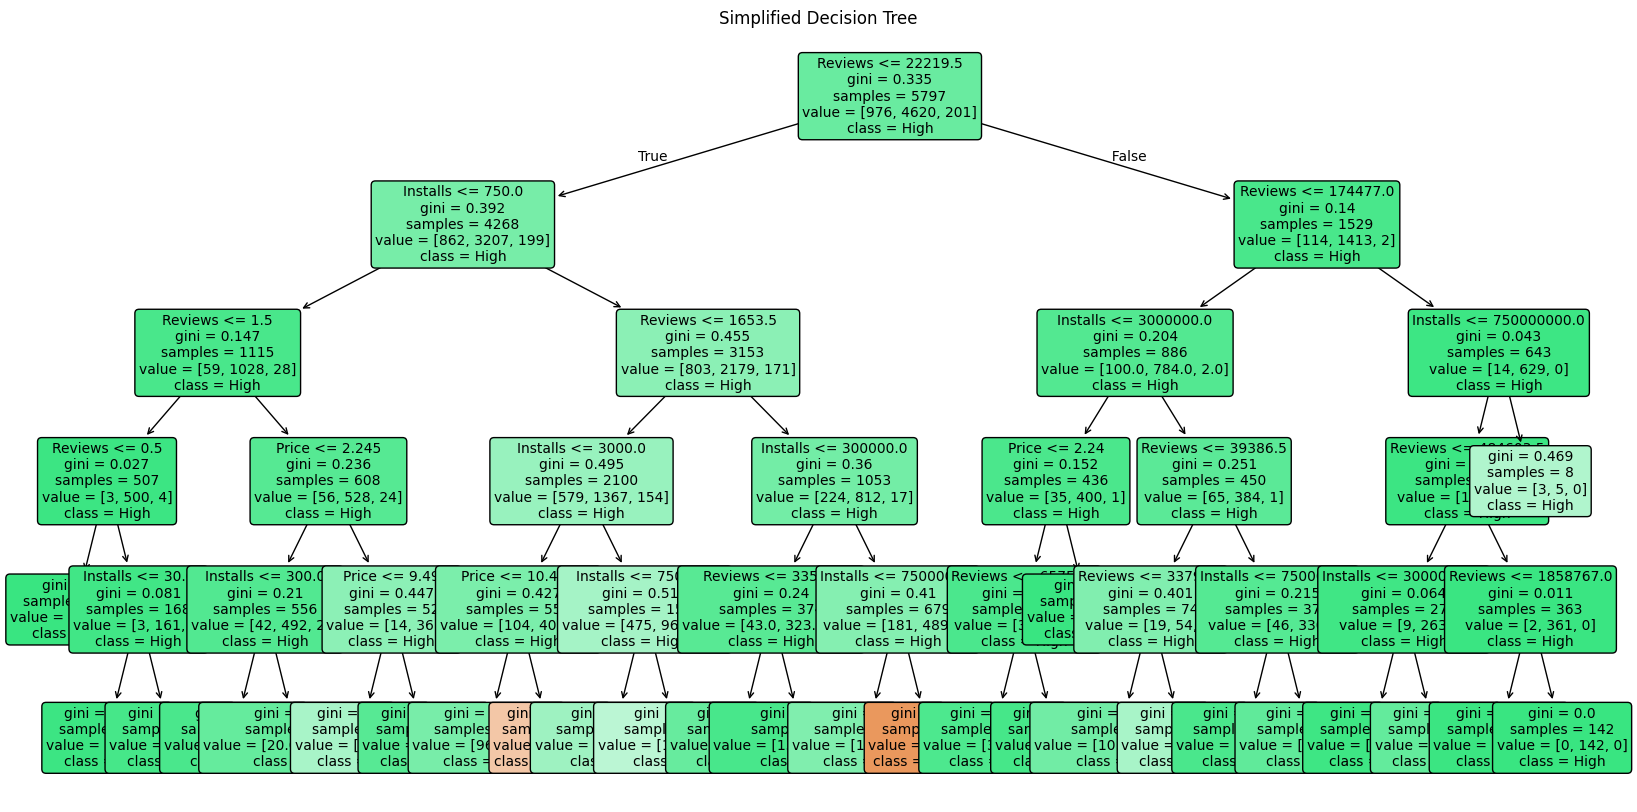

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=X_reduced.columns,
    class_names=dt_classifier.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Simplified Decision Tree")
plt.show()

## Part 3. Predicting Revenue Potential Category (Low, Moderate, High)

In [ ]:
#Define Revenue Potential
df['Revenue_Potential'] = df['Price'] * df['Installs']

In [ ]:
#Low, Moderate, High
def categorize_revenue(revenue):
    if revenue < 1_000_000:
        return 'Low'
    elif 1_000_000 <= revenue < 10_000_000:
        return 'Moderate'
    else:
        return 'High'

In [ ]:
df['Revenue_Label'] = df['Revenue_Potential'].apply(categorize_revenue)

In [ ]:
feature_cols = ['Rating', 'Reviews', 'Size', 'Price', 'Installs']
X = df[feature_cols]
y = df['Revenue_Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dt_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy for Revenue_Label: {accuracy:.2f}")


Accuracy for Revenue_Label: 1.00


In [ ]:
print("\nClassification Report for Revenue_Label:")
print(classification_report(y_test, y_pred))


Classification Report for Revenue_Label:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1446
    Moderate       1.00      0.50      0.67         4

    accuracy                           1.00      1450
   macro avg       1.00      0.75      0.83      1450
weighted avg       1.00      1.00      1.00      1450



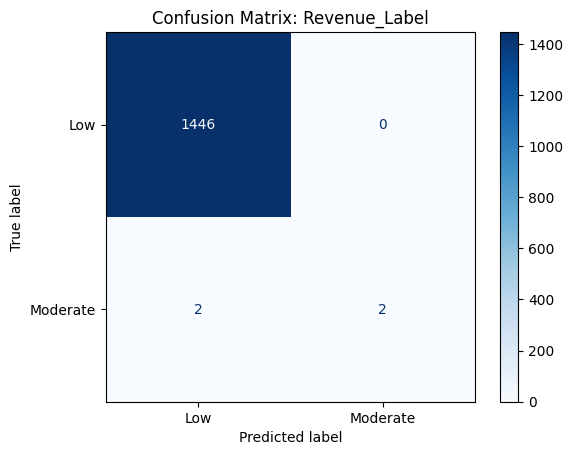

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=unique_labels(y_test, y_pred),  # Dynamically adjust labels
    cmap='Blues'
)
plt.title("Confusion Matrix: Revenue_Label")
plt.show()

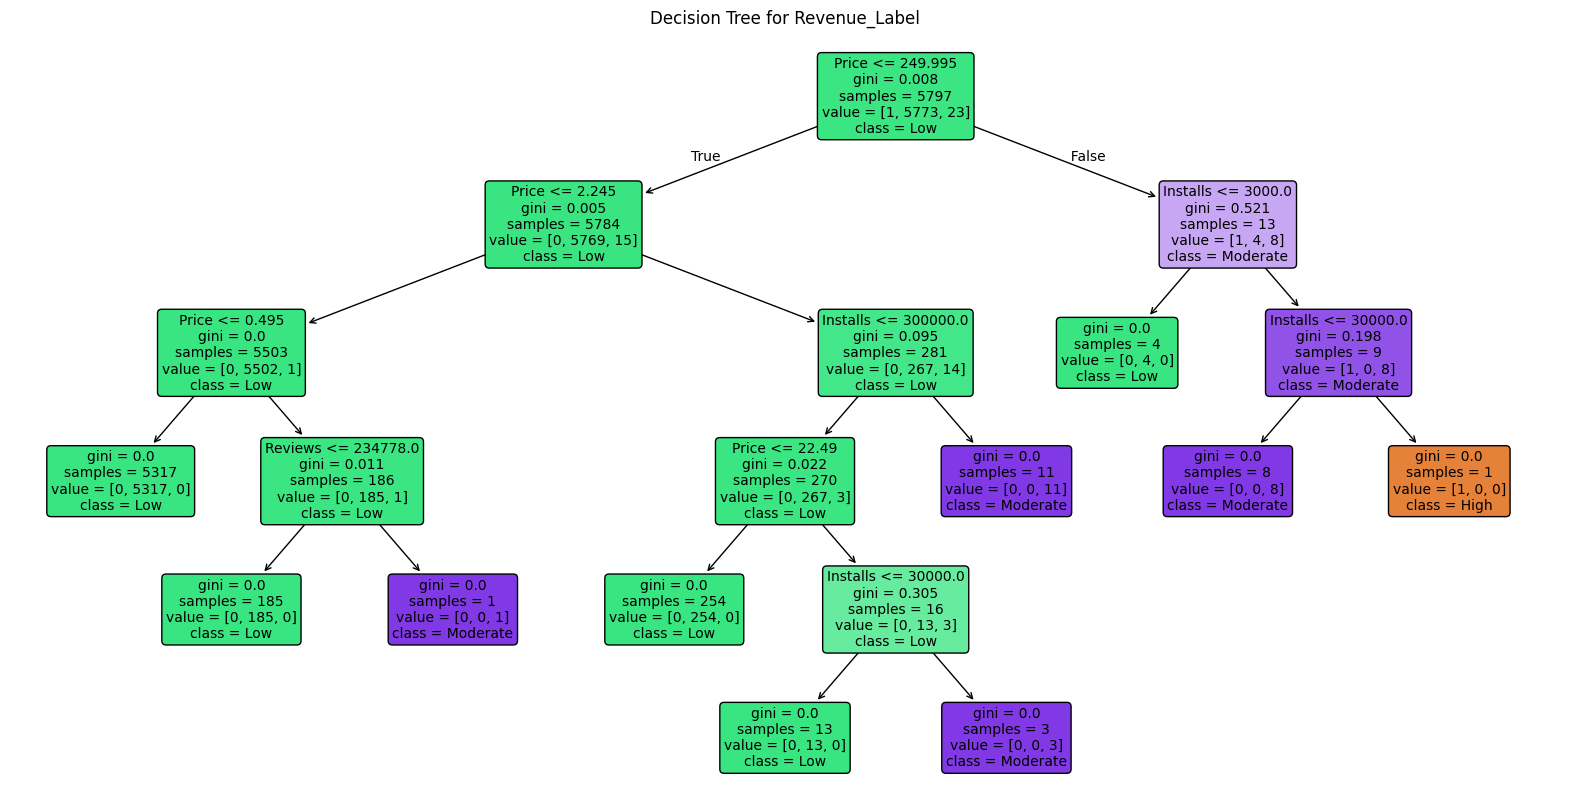

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=dt_classifier.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Revenue_Label")
plt.show()

In [ ]:
#Tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': [None, 'balanced']
}

In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

In [ ]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned Model Accuracy: {accuracy_tuned:.2f}")


Tuned Model Accuracy: 1.00


In [ ]:
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))


Classification Report for Tuned Model:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1446
    Moderate       1.00      0.50      0.67         4

    accuracy                           1.00      1450
   macro avg       1.00      0.75      0.83      1450
weighted avg       1.00      1.00      1.00      1450



## Part 4. Predicting App Price Category (Free vs. Paid)

In [ ]:
def categorize_price(price):
    return 'Free' if price == 0 else 'Paid'

df['Price_Label'] = df['Price'].apply(categorize_price)

In [ ]:
feature_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Android Version']
X = df[feature_cols]
y = df['Price_Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_classifier = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy for Price_Label: {accuracy:.4f}")


Accuracy for Price_Label: 0.9393


In [ ]:
print("\nClassification Report for Price_Label:")
print(classification_report(y_test, y_pred))


Classification Report for Price_Label:
              precision    recall  f1-score   support

        Free       0.94      0.99      0.97      1357
        Paid       0.62      0.14      0.23        93

    accuracy                           0.94      1450
   macro avg       0.78      0.57      0.60      1450
weighted avg       0.92      0.94      0.92      1450



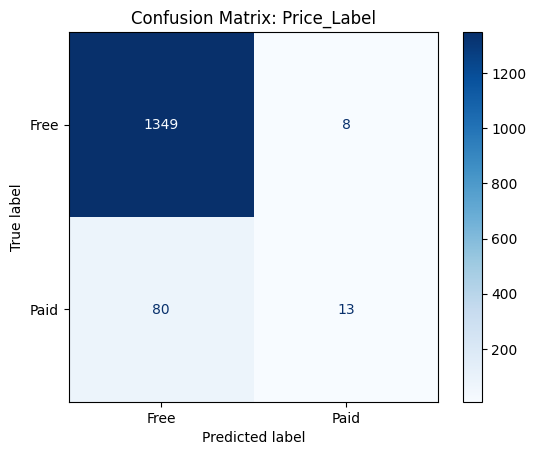

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=unique_labels(y_test, y_pred),
    cmap='Blues'
)
plt.title("Confusion Matrix: Price_Label")
plt.show()

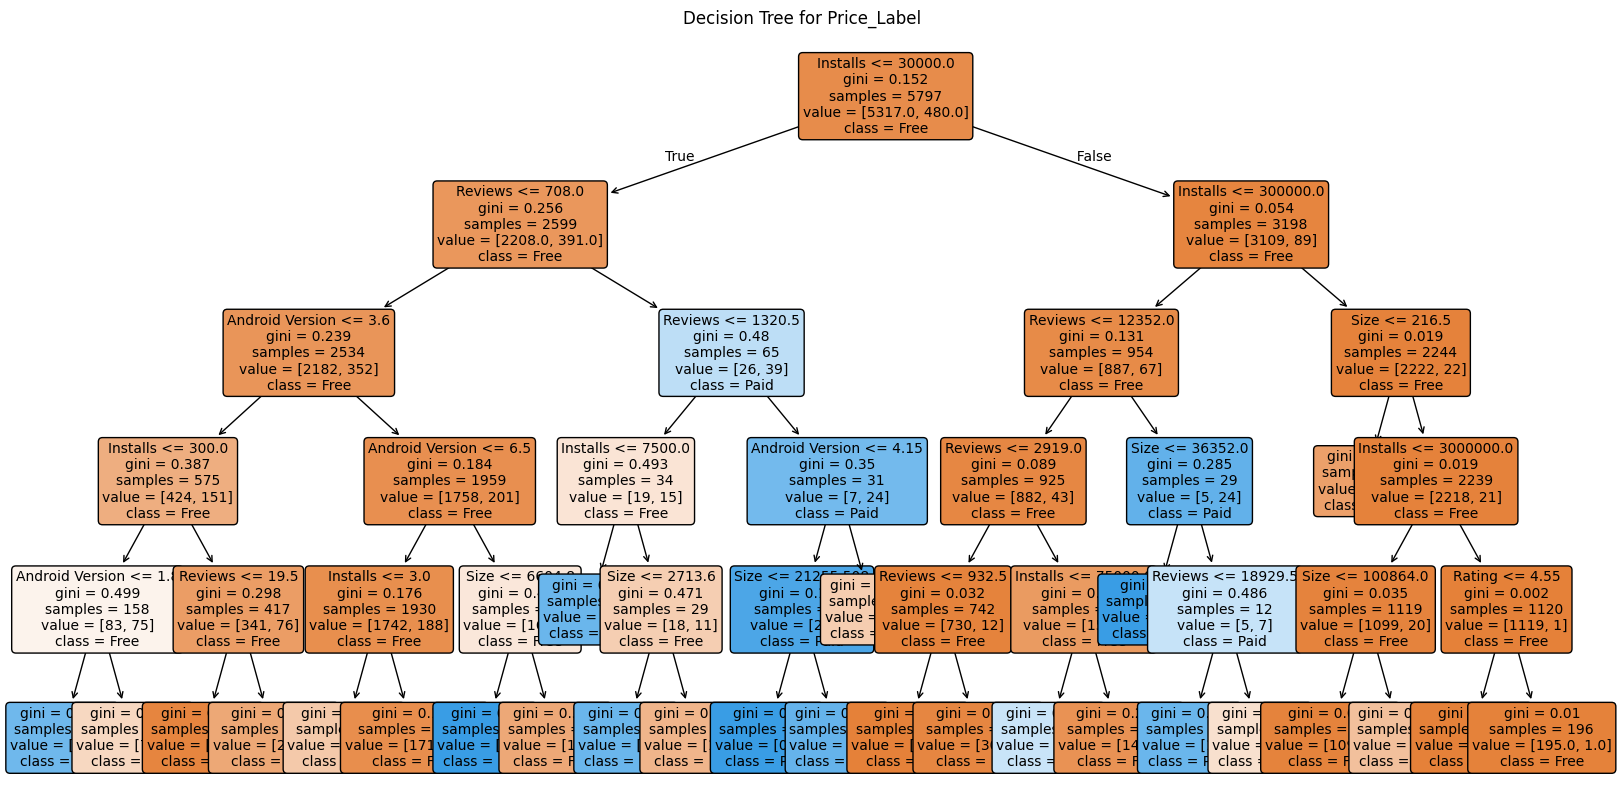

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=dt_classifier.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree for Price_Label")
plt.show()